Episode: 0, Reward: 1, Success: True
Episode: 1, Reward: -5, Success: False
Episode: 2, Reward: -5, Success: False
Episode: 3, Reward: -5, Success: False
Episode: 4, Reward: 1, Success: True
Episode: 5, Reward: -5, Success: False
Episode: 6, Reward: -5, Success: False
Episode: 7, Reward: -5, Success: False
Episode: 8, Reward: -5, Success: False
Episode: 9, Reward: -5, Success: False
Episode: 10, Reward: -5, Success: False
Episode: 11, Reward: -5, Success: False
Episode: 12, Reward: -5, Success: False
Episode: 13, Reward: -5, Success: False
Episode: 14, Reward: -5, Success: False
Episode: 15, Reward: -5, Success: False
Episode: 16, Reward: -5, Success: False
Episode: 17, Reward: -5, Success: False
Episode: 18, Reward: -5, Success: False
Episode: 19, Reward: -5, Success: False
Episode: 20, Reward: -5, Success: False
Episode: 21, Reward: -5, Success: False
Episode: 22, Reward: 1, Success: True
Episode: 23, Reward: -5, Success: False
Episode: 24, Reward: -5, Success: False
Episode: 25, Rew

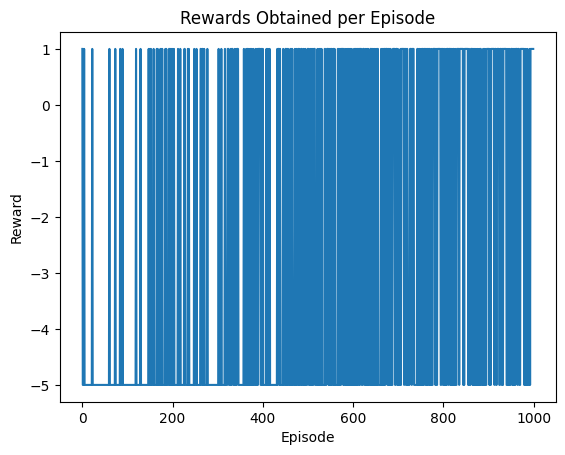

Success rate: 36.50%


In [32]:
import gym
from gym.envs.registration import register
import numpy as np
import random
import matplotlib.pyplot as plt

# Register the custom FrozenLake environment
register(
    id='CustomRewardFrozenLake-v1',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 'is_slippery': False},
    max_episode_steps=1000,
    reward_threshold=0.78,  # Adjust the reward threshold if needed
)

# Define the custom FrozenLake environment with modified rewards
class CustomRewardFrozenLake(gym.Env):
    def __init__(self):
        self.env = gym.make("CustomRewardFrozenLake-v1")
        self.observation_space = self.env.observation_s5000pace
        self.action_space = self.env.action_space

    def step(self, action):
        state, reward, done, info = self.env.step(action)
        if reward == 0 and not done:
            reward = 0
        elif reward == 0 and done:
            reward = -5
        elif reward == 1:
            reward = 1
        return state, reward, done, info

    def reset(self):
        return self.env.reset()

    def render(self):
        self.env.render()

    def close(self):
        self.env.close()

# Initialize the environment
env = CustomRewardFrozenLake()
num_states = env.observation_space.n
num_actions = env.action_space.n

# Initialize the Q-table with small random values
Q = np.random.rand(num_states, num_actions) * 0.01

# Set hyperparameters
alpha = 0.1  # learning rate
gamma = 0.99  # discount factor
epsilon = 0.9  # initial exploration rate
epsilon_min = 0.01  # minimum exploration rate
epsilon_decay = 0.999  # exploration rate decay factor

# Training loop
num_episodes = 1000
success_count = 0

# Store rewards obtained per episode
episode_rewards = []

for episode in range(num_episodes):
    state = env.reset()
    episode_reward = 0
    success = False

    while True:
        # Choose action using epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # explore
        else:
            action = np.argmax(Q[state])  # exploit

        # Take action
        next_state, reward, done, _ = env.step(action)

        # Update Q-value using SARSA
        next_action = np.argmax(Q[next_state])
        td_target = reward + gamma * Q[next_state, next_action]
        td_error = td_target - Q[state, action]
        Q[state, action] += alpha * td_error

        episode_reward += reward

        state = next_state

        if done:
            success = reward == 1
            if success:
                success_count += 1
            break

    # Decay exploration rate
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Store episode reward
    episode_rewards.append(episode_reward)

    print("Episode: {}, Reward: {}, Success: {}".format(episode, episode_reward, success))

# Plotting rewards obtained per episode
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards Obtained per Episode')
plt.show()

print("Success rate: {:.2f}%".format(success_count / num_episodes * 100))
env.close()
